In [43]:

import matplotlib.pyplot as plt
from datetime import datetime
from typing import Union, Tuple
import polars as pl
import numpy as np
import glob
import re

## Preliminaries

In [4]:
def columns():
    return ["LCLid", "DateTime", "KWH/hh (per half hour) "]
def files():
    csv_files = glob.glob("LCL/LCL-June2015v2_*.csv")
    csv_files.sort(key=lambda x: int(re.search(r'v2_(\d+)', x).group(1)))
    return csv_files


In [5]:
pl.enable_string_cache()

df_list = []

for file in files():
    print(f"Processing: {file}")
    df_part = pl.read_csv(
        file,
        columns=["LCLid", "DateTime", "KWH/hh (per half hour) "],
        dtypes={"LCLid": pl.Categorical, "DateTime": pl.Utf8, "KWH/hh (per half hour) ": pl.Utf8},
        #try_parse_dates=True,
        null_values=["Null"]
    ).rename({"KWH/hh (per half hour) ": "KWH"})

    df_part = df_part.with_columns([
        pl.col("KWH").str.strip_chars().cast(pl.Float32),  # Clean and cast KWH
        pl.col("DateTime").str.slice(0, 19).str.to_datetime(format="%Y-%m-%d %H:%M:%S")  # Convert DateTime
    ])


    df_list.append(df_part)

df_raw = pl.concat(df_list)  # Now, this will work without error
del df_list




Processing: LCL\LCL-June2015v2_0.csv


C:\Users\asogw\AppData\Local\Temp\ipykernel_26712\369618804.py:7: DeprecationWarning: The argument `dtypes` for `read_csv` is deprecated. It has been renamed to `schema_overrides`.
  df_part = pl.read_csv(


Processing: LCL\LCL-June2015v2_1.csv
Processing: LCL\LCL-June2015v2_2.csv
Processing: LCL\LCL-June2015v2_3.csv
Processing: LCL\LCL-June2015v2_4.csv
Processing: LCL\LCL-June2015v2_5.csv
Processing: LCL\LCL-June2015v2_6.csv
Processing: LCL\LCL-June2015v2_7.csv
Processing: LCL\LCL-June2015v2_8.csv
Processing: LCL\LCL-June2015v2_9.csv
Processing: LCL\LCL-June2015v2_10.csv
Processing: LCL\LCL-June2015v2_11.csv
Processing: LCL\LCL-June2015v2_12.csv
Processing: LCL\LCL-June2015v2_13.csv
Processing: LCL\LCL-June2015v2_14.csv
Processing: LCL\LCL-June2015v2_15.csv
Processing: LCL\LCL-June2015v2_16.csv
Processing: LCL\LCL-June2015v2_17.csv
Processing: LCL\LCL-June2015v2_18.csv
Processing: LCL\LCL-June2015v2_19.csv
Processing: LCL\LCL-June2015v2_20.csv
Processing: LCL\LCL-June2015v2_21.csv
Processing: LCL\LCL-June2015v2_22.csv
Processing: LCL\LCL-June2015v2_23.csv
Processing: LCL\LCL-June2015v2_24.csv
Processing: LCL\LCL-June2015v2_25.csv
Processing: LCL\LCL-June2015v2_26.csv
Processing: LCL\LCL-J

## Exploratory Data Analysis

In [14]:
print(df_raw.schema) 
print("size: ",df_raw.estimated_size() / (1024 ** 3))
#print(f"duplicates: {df_raw.is_duplicated().sum()}") #beware! crashes the kernel
print(df_raw.describe())


Schema({'LCLid': Categorical(ordering='physical'), 'DateTime': Datetime(time_unit='us', time_zone=None), 'KWH': Float32})
size:  2.5075396420434117
shape: (9, 4)
┌────────────┬───────────┬────────────────────────────┬──────────────┐
│ statistic  ┆ LCLid     ┆ DateTime                   ┆ KWH          │
│ ---        ┆ ---       ┆ ---                        ┆ ---          │
│ str        ┆ str       ┆ str                        ┆ f64          │
╞════════════╪═══════════╪════════════════════════════╪══════════════╡
│ count      ┆ 167932474 ┆ 167932474                  ┆ 1.67926914e8 │
│ null_count ┆ 0         ┆ 0                          ┆ 5560.0       │
│ mean       ┆ null      ┆ 2013-03-28 05:35:22.133249 ┆ 0.211763     │
│ std        ┆ null      ┆ null                       ┆ 0.297259     │
│ min        ┆ null      ┆ 2011-11-23 09:00:00        ┆ 0.0          │
│ 25%        ┆ null      ┆ 2012-10-21 20:30:00        ┆ 0.058        │
│ 50%        ┆ null      ┆ 2013-03-30 05:30:00        ┆ 0

In [117]:
print(df_raw[40:80])

shape: (40, 3)
┌───────────┬─────────────────────┬───────┐
│ LCLid     ┆ DateTime            ┆ KWH   │
│ ---       ┆ ---                 ┆ ---   │
│ cat       ┆ datetime[μs]        ┆ f32   │
╞═══════════╪═════════════════════╪═══════╡
│ MAC000002 ┆ 2012-10-12 21:00:00 ┆ 0.193 │
│ MAC000002 ┆ 2012-10-12 21:30:00 ┆ 0.342 │
│ MAC000002 ┆ 2012-10-12 22:00:00 ┆ 0.27  │
│ MAC000002 ┆ 2012-10-12 22:30:00 ┆ 0.325 │
│ MAC000002 ┆ 2012-10-12 23:00:00 ┆ 0.269 │
│ …         ┆ …                   ┆ …     │
│ MAC000002 ┆ 2012-10-13 14:30:00 ┆ 0.263 │
│ MAC000002 ┆ 2012-10-13 15:00:00 ┆ 0.134 │
│ MAC000002 ┆ 2012-10-13 15:30:00 ┆ 0.235 │
│ MAC000002 ┆ 2012-10-13 16:00:00 ┆ 0.124 │
│ MAC000002 ┆ 2012-10-13 16:30:00 ┆ 0.184 │
└───────────┴─────────────────────┴───────┘


## Data Cleaning and structuring
## Strategy
1. resample the data to 1 hour resolution
1. Any household with more than 10 continous missing data is dropped from the dataset
2. For other cases, we input: x(i) = x(i-1) + x(i+1)
4. The dataset is reshaped to 2d, each column represents 24 hour readings, rows are days

In [16]:
#polars ignores null values so x + null = x
df_resampled = (
    df_raw.group_by_dynamic("DateTime", every="1h", by="LCLid", closed="right")
    .agg(pl.col("KWH").sum().alias("KWH_hourly"))
)

C:\Users\asogw\AppData\Local\Temp\ipykernel_26712\3822079267.py:3: DeprecationWarning: The argument `by` for `DataFrame.group_by_dynamic` is deprecated. It has been renamed to `group_by`.
  df_raw.group_by_dynamic("DateTime", every="1h", by="LCLid", closed="right")


In [118]:
print("estimated_size: ",df_resampled.estimated_size() / (1024 ** 3))
print(df_resampled[20:40])


estimated_size:  1.2505591195076704
shape: (20, 3)
┌───────────┬─────────────────────┬────────────┐
│ LCLid     ┆ DateTime            ┆ KWH_hourly │
│ ---       ┆ ---                 ┆ ---        │
│ cat       ┆ datetime[μs]        ┆ f32        │
╞═══════════╪═════════════════════╪════════════╡
│ MAC000002 ┆ 2012-10-12 20:00:00 ┆ 0.436      │
│ MAC000002 ┆ 2012-10-12 21:00:00 ┆ 0.612      │
│ MAC000002 ┆ 2012-10-12 22:00:00 ┆ 0.594      │
│ MAC000002 ┆ 2012-10-12 23:00:00 ┆ 0.553      │
│ MAC000002 ┆ 2012-10-13 00:00:00 ┆ 0.544      │
│ …         ┆ …                   ┆ …          │
│ MAC000002 ┆ 2012-10-13 11:00:00 ┆ 0.214      │
│ MAC000002 ┆ 2012-10-13 12:00:00 ┆ 0.209      │
│ MAC000002 ┆ 2012-10-13 13:00:00 ┆ 0.218      │
│ MAC000002 ┆ 2012-10-13 14:00:00 ┆ 0.397      │
│ MAC000002 ┆ 2012-10-13 15:00:00 ┆ 0.359      │
└───────────┴─────────────────────┴────────────┘


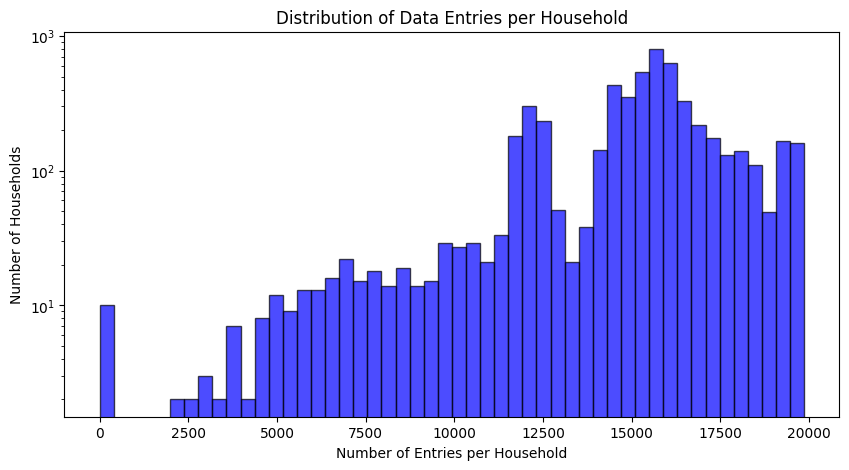

In [18]:

# distribution of records per household
household_counts = df_resampled.group_by("LCLid").len()
household_counts_np = household_counts["len"].to_numpy()
plt.figure(figsize=(10, 5))
plt.hist(household_counts_np, bins=50, color="blue", alpha=0.7, edgecolor="black")

plt.xlabel("Number of Entries per Household")
plt.ylabel("Number of Households")
plt.title("Distribution of Data Entries per Household")
plt.yscale("log")  #log scale for better visualization of large differences

plt.show()


In [ ]:
# Find all households that have mising records recordings between hours
def compute():
    household_missing_stats = (
        df_resampled
        .group_by("LCLid")
        .agg(
            pl.min("DateTime").alias("start_time"),
            pl.max("DateTime").alias("end_time"),
            pl.len().alias("actual_hours") 
        )
        .with_columns(
            ((pl.col("end_time") - pl.col("start_time")).dt.total_seconds() / 3600 + 1)
            .cast(pl.Int64)
            .alias("expected_hours")
        )
        .with_columns(
            (pl.col("actual_hours") < pl.col("expected_hours")).alias("has_missing_hours")
        )
    )

    num_households_with_missing_hours = household_missing_stats["has_missing_hours"].sum()

    print(f"{num_households_with_missing_hours} households have missing hours")

compute()    

3472 households have missing hours


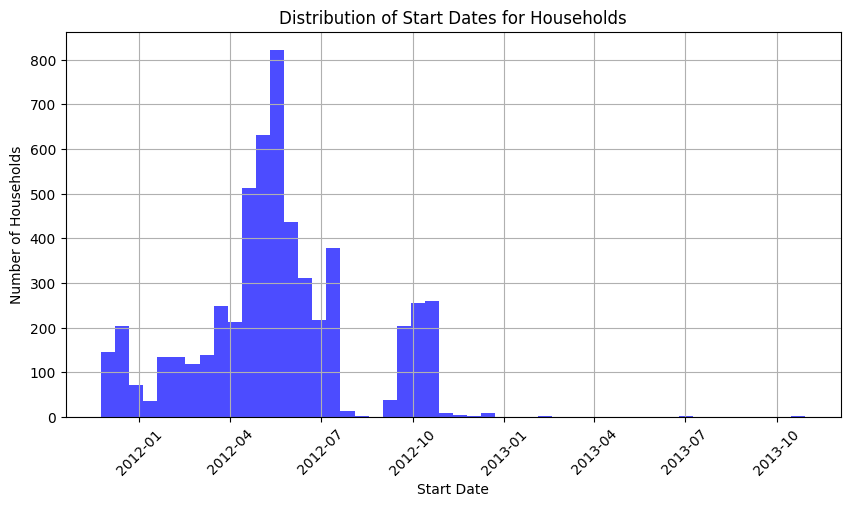

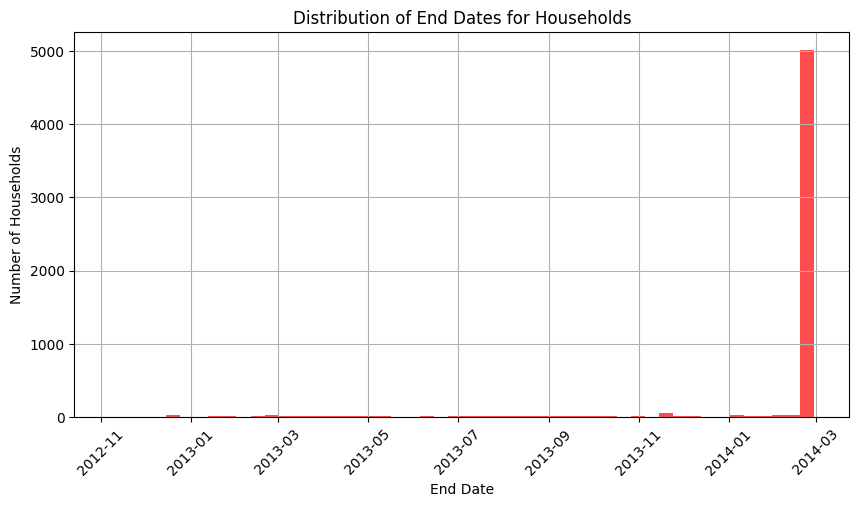

In [22]:
#determine the optimal global start and end dates cutoff by looking 
# at the graphs of the start and end recording dates of households
household_dates = 0
def graph():
    global household_dates
    household_dates = df_resampled.group_by("LCLid").agg([
        pl.col("DateTime").min().alias("start_date"),
        pl.col("DateTime").max().alias("end_date")
    ])

    start_dates = household_dates["start_date"].to_numpy()
    end_dates = household_dates["end_date"].to_numpy()

    plt.figure(figsize=(10, 5))
    plt.hist(start_dates, bins=50, color="blue", alpha=0.7)
    plt.xlabel("Start Date")
    plt.ylabel("Number of Households")
    plt.title("Distribution of Start Dates for Households")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.hist(end_dates, bins=50, color="red", alpha=0.7)
    plt.xlabel("End Date")
    plt.ylabel("Number of Households")
    plt.title("Distribution of End Dates for Households")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

graph()   


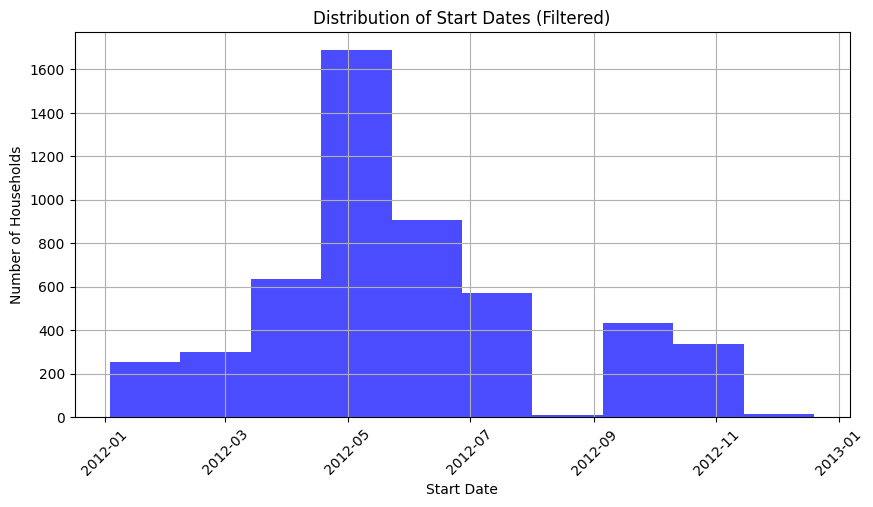

In [23]:

#drill further into begin dates
def graph():
    start_range_lower = datetime(2012, 1, 1)
    start_range_upper = datetime(2013, 1, 1)

    filtered_start = household_dates.filter(
        (pl.col("start_date") >= start_range_lower) &
        (pl.col("start_date") <= start_range_upper)
    )

    # Continue as before for plotting
    start_dates_filtered = filtered_start["start_date"].to_numpy()

    plt.figure(figsize=(10, 5))
    plt.hist(start_dates_filtered, bins=10, color="blue", alpha=0.7)
    plt.xlabel("Start Date")
    plt.ylabel("Number of Households")
    plt.title("Distribution of Start Dates (Filtered)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
graph()

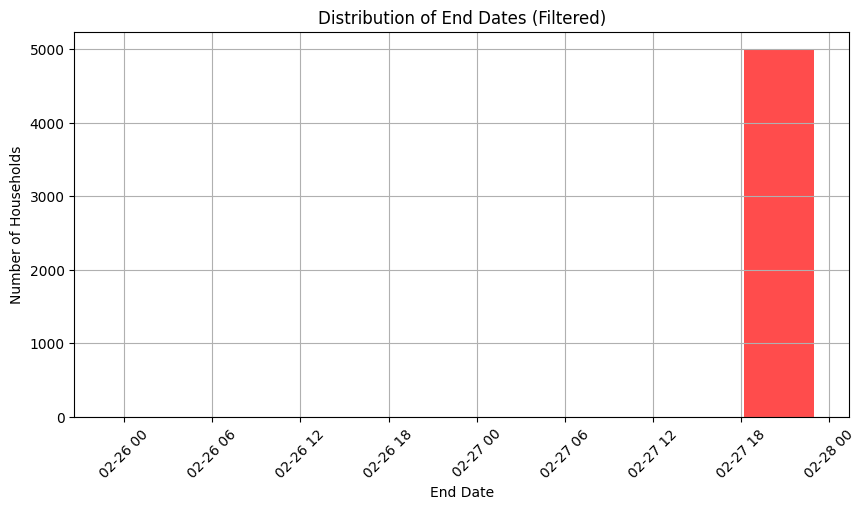

In [25]:

# further drill into end dates
def graph():
    end_range_lower = datetime(2014, 2, 25)
    end_range_upper = datetime(2014, 2, 28)

    filtered_end = household_dates.filter(
        (pl.col("end_date") >= end_range_lower) &
        (pl.col("end_date") <= end_range_upper)
    )
    end_dates_filtered = filtered_end["end_date"].to_numpy()

    plt.figure(figsize=(10, 5))
    plt.hist(end_dates_filtered, color="red", alpha=0.7)
    plt.xlabel("End Date")
    plt.ylabel("Number of Households")
    plt.title("Distribution of End Dates (Filtered)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

graph()

In [207]:
#view sample energy profile of any user. plots the first day of the
#week(specified by the user) encounted in the dataset
def plot_energy_for_multiple_days(df, user_day_pairs, title):
    df = df.with_columns(
        pl.col("DateTime").cast(pl.Datetime).dt.weekday().alias("weekday"),
        pl.col("DateTime").cast(pl.Datetime).dt.date().alias("date"),
        pl.col("DateTime").cast(pl.Datetime).dt.hour().alias("hour") 
    )
    plt.figure(figsize=(12, 8))
    for household_id, day_of_week in user_day_pairs:
        household_data = df.filter(pl.col("LCLid") == household_id)
        first_day_data = household_data.filter(pl.col("weekday") == day_of_week).head(1)

        if first_day_data.shape[0] == 0:
            print(f"No data found for household {household_id} on the given day.")
            continue
        first_day = first_day_data["DateTime"].to_numpy()[0]
        first_day = np.datetime64(first_day).astype('M8[D]').tolist()
        same_day_data = household_data.filter(pl.col("date") == first_day)

        hourly_data = same_day_data.group_by("hour").agg(pl.col("KWH_hourly").mean().alias("avg_kwh"))
        all_hours = pl.DataFrame({"hour": list(range(24))})
        hourly_data_sorted = all_hours.join(hourly_data, on="hour", how="left")
        hourly_data_sorted = hourly_data_sorted.fill_null(0)
        plt.plot(hourly_data_sorted["hour"].to_list(), hourly_data_sorted["avg_kwh"].to_list(),
                 label=f"{household_id} ({first_day.strftime('%A')})")

    plt.xlabel("Hour of the Day (0-23)")
    plt.ylabel("Average Energy Consumption (KWH)")
    plt.title(title)
    plt.xticks(np.arange(0, 24, step=1))  
    plt.grid(True)
    plt.legend(loc="upper center")
    plt.tight_layout()
    plt.show()



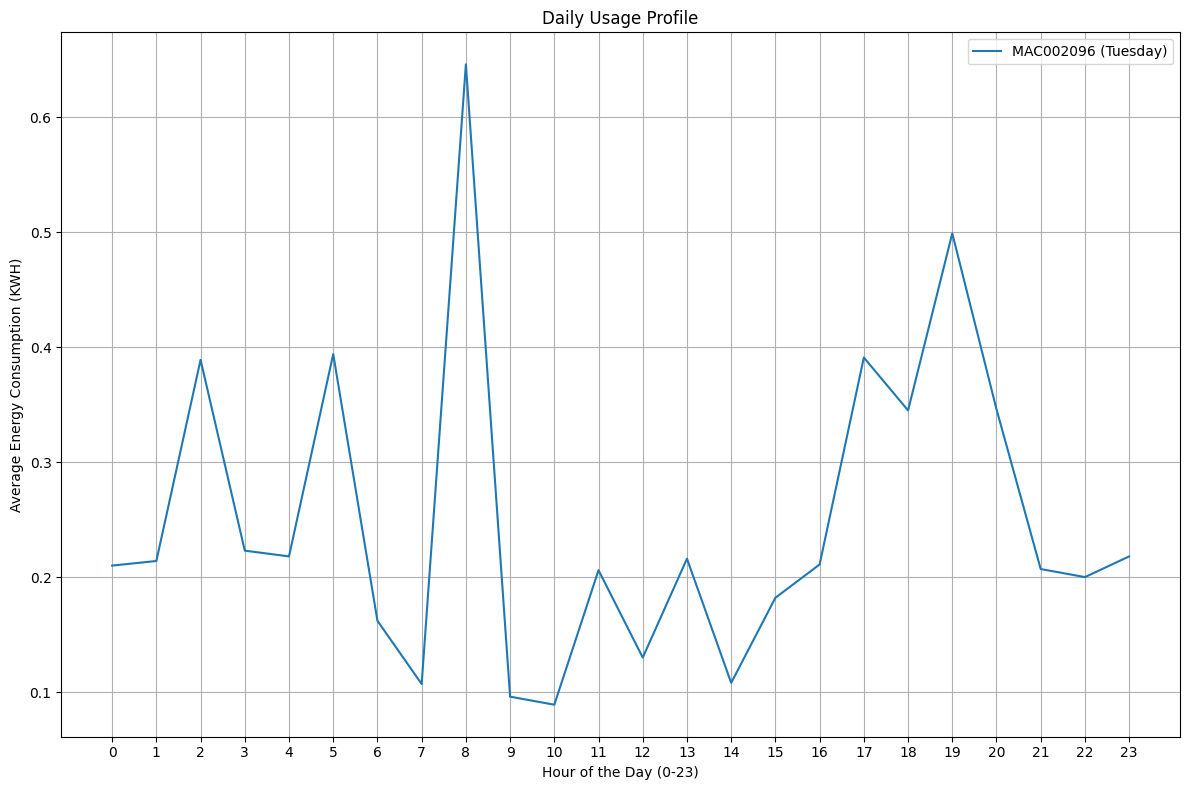

In [190]:
user_day_pairs = [
    ("MAC002096", 2)   # Monday
]

plot_energy_for_multiple_days(df_resampled, user_day_pairs, "Daily Usage Profile")

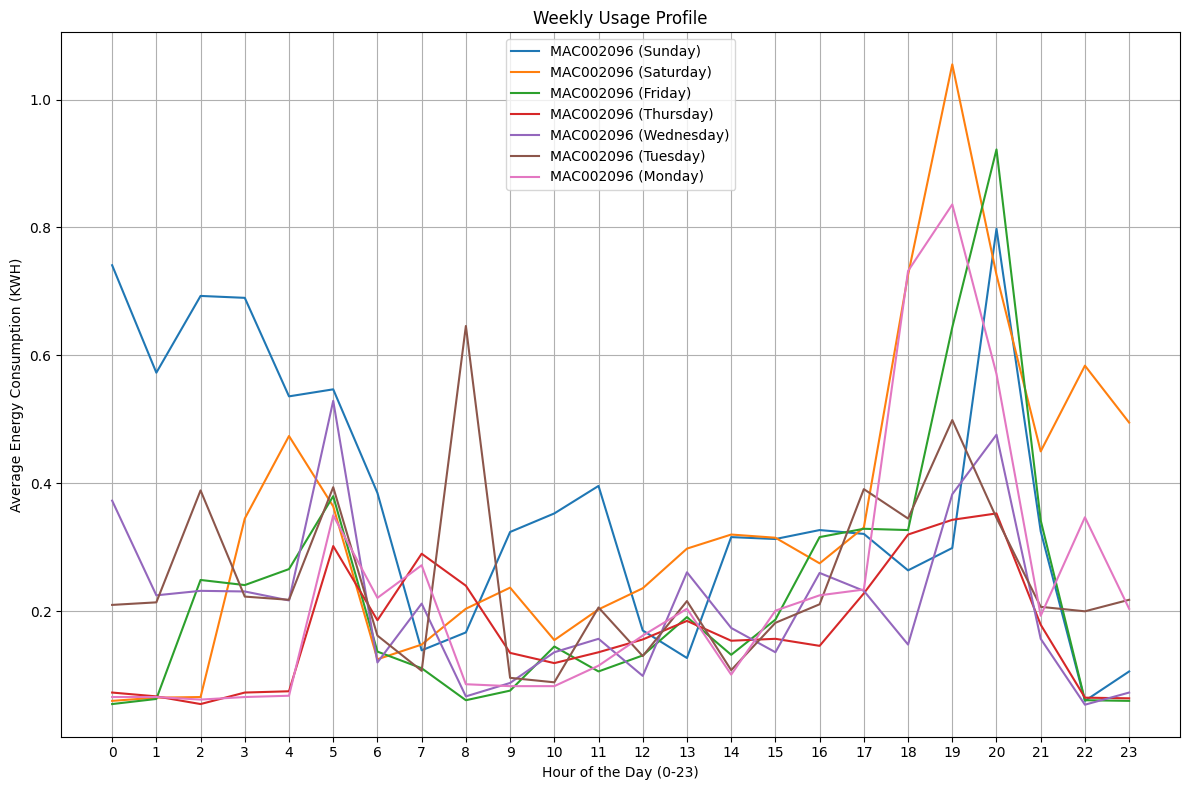

In [208]:
#weekly energy profile
user = "MAC002096"
user_day_pairs = [
    (user, 7),  # Sunday
    (user, 6),  # Wednesday
    (user, 5),  # Wednesday
    (user, 4),  # Wednesday
    (user, 3),  # Wednesday
    (user, 2),  # Wednesday
    (user, 1)   # Monday
]

plot_energy_for_multiple_days(df_resampled, user_day_pairs, "Weekly Usage Profile")

In [204]:
import calendar

def plot_monthly_usage_for_multiple_users(df, user_month_pairs, title):
    df = df.with_columns(
        pl.col("DateTime").cast(pl.Datetime).dt.month().alias("month"),
        pl.col("DateTime").cast(pl.Datetime).dt.date().alias("date"),
        pl.col("DateTime").cast(pl.Datetime).dt.hour().alias("hour")
    )
    plt.figure(figsize=(12, 8))

    for household_id, month in user_month_pairs:
        household_data = df.filter(pl.col("LCLid") == household_id)
        monthly_data = household_data.filter(pl.col("month") == month)
        if monthly_data.shape[0] == 0:
            print(f"No data found for household {household_id} in month {month}.")
            continue
        hourly_avg_data = monthly_data.group_by(["date", "hour"]).agg(pl.col("KWH_hourly").mean().alias("avg_kwh"))
        monthly_avg_hourly_data = hourly_avg_data.group_by("hour").agg(pl.col("avg_kwh").mean().alias("avg_kwh"))
        all_hours = pl.DataFrame({"hour": list(range(24))})
        hourly_data_sorted = all_hours.join(monthly_avg_hourly_data, on="hour", how="left")
        hourly_data_sorted = hourly_data_sorted.fill_null(0)
        month_name = calendar.month_name[month]
        plt.plot(hourly_data_sorted["hour"].to_list(), hourly_data_sorted["avg_kwh"].to_list(),
                 label=f"{household_id} - {month_name}")
    plt.xlabel("Hour of the Day (0-23)")
    plt.ylabel("Average Energy Consumption (KWH)")
    plt.title(title)
    plt.xticks(np.arange(0, 24, step=1))
    plt.grid(True)
    plt.legend(loc="upper center")
    plt.tight_layout()
    plt.show()



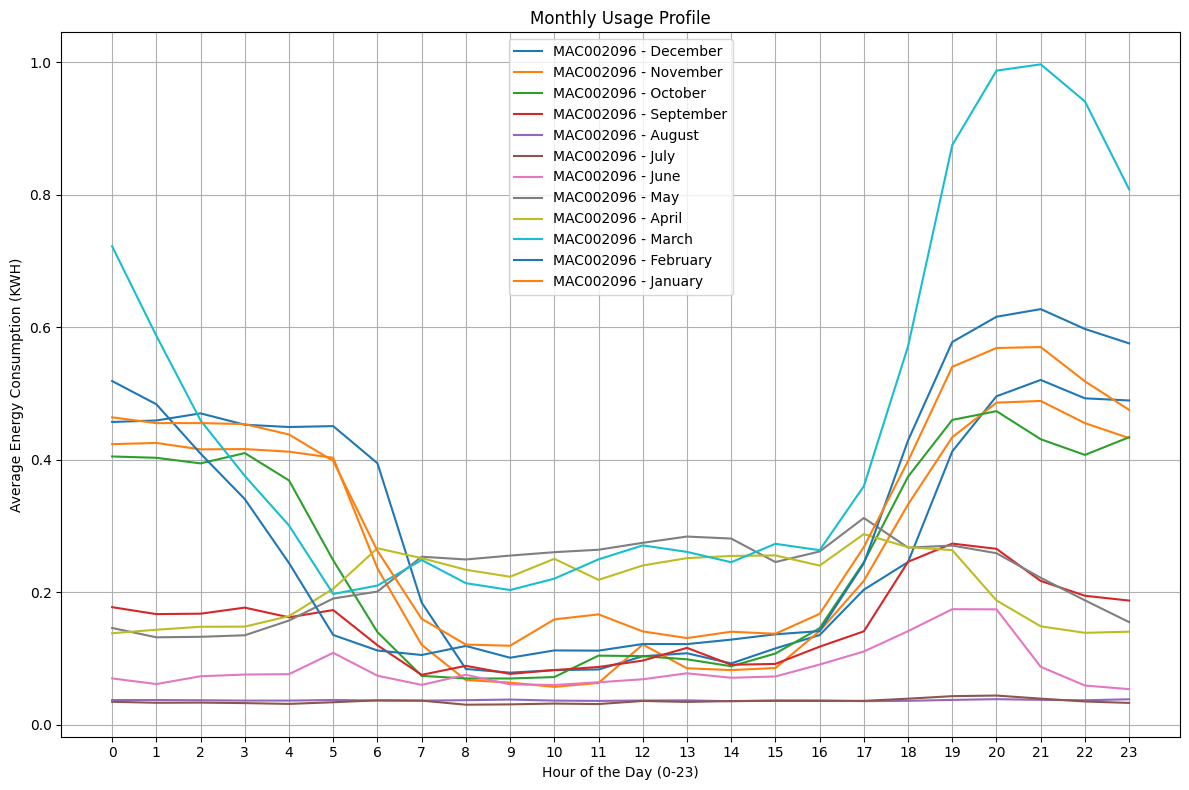

In [205]:
user = "MAC002096"
user_month_pairs = [
    (user, 12),  # February
    (user, 11),  # May
    (user, 10),  # July
    (user, 9),   # July
    (user, 8),   # July
    (user, 7),   # July
    (user, 6),   # July
    (user, 5),   # July
    (user, 4),   # July
    (user, 3),   # July
    (user, 2),   # July
    (user, 1),   # July
]

plot_monthly_usage_for_multiple_users(df_resampled, user_month_pairs, "Monthly Usage Profile")

## Data Cleaning

In [28]:
#Looking at the previous graphs, recording started at different times for
# different household we need to cut off the start periods before 2013-01(false start period) 
#the ending time dont have this problem as we see, all recording came to a global stop at the same date(almost)

cutoff_date = datetime(2013, 1, 1)

df_false_start_remv = df_resampled.filter(pl.col("DateTime") >= pl.lit(cutoff_date))


In [31]:
print("estimated_size: ",df_false_start_remv.estimated_size() / (1024 ** 3))

estimated_size:  0.797727195546031


In [ ]:
#ensure every household has a complete set of hourly timestamps.
#eor each household, create a full hourly time series from the earliest to latest recorded timestamp.
#if a household is missing data for a specific hour, fill it with NaN.

global_min = df_false_start_remv.select(pl.col("DateTime").min()).item()  # earliest timestamp
global_max = df_false_start_remv.select(pl.col("DateTime").max()).item()  # latest timestamp
global_hours_expr = pl.datetime_range(
    start=global_min, 
    end=global_max, 
    interval="1h",  
    closed="both",  
    eager=True       
)
df_global_hours = pl.DataFrame({"DateTime": global_hours_expr})

households = df_false_start_remv.select("LCLid").unique()
complete_grid = households.join(df_global_hours, how="cross")

df_standard = complete_grid.join(df_false_start_remv, on=["LCLid", "DateTime"], how="left")


In [33]:
print(df_standard.describe())

shape: (9, 4)
┌────────────┬──────────┬─────────────────────┬─────────────┐
│ statistic  ┆ LCLid    ┆ DateTime            ┆ KWH_hourly  │
│ ---        ┆ ---      ┆ ---                 ┆ ---         │
│ str        ┆ str      ┆ str                 ┆ f64         │
╞════════════╪══════════╪═════════════════════╪═════════════╡
│ count      ┆ 56120256 ┆ 56120256            ┆ 5.3527851e7 │
│ null_count ┆ 0        ┆ 0                   ┆ 2.592405e6  │
│ mean       ┆ null     ┆ 2013-07-31 11:30:00 ┆ 0.428937    │
│ std        ┆ null     ┆ null                ┆ 0.56926     │
│ min        ┆ null     ┆ 2013-01-01 00:00:00 ┆ 0.0         │
│ 25%        ┆ null     ┆ 2013-04-16 18:00:00 ┆ 0.122       │
│ 50%        ┆ null     ┆ 2013-07-31 12:00:00 ┆ 0.245       │
│ 75%        ┆ null     ┆ 2013-11-14 05:00:00 ┆ 0.496       │
│ max        ┆ null     ┆ 2014-02-27 23:00:00 ┆ 21.015999   │
└────────────┴──────────┴─────────────────────┴─────────────┘


In [34]:
# Identify households with a streak of at least `x` consecutive null values in 'KWH_hourly'.
# they are bad datapoints so drop them


def process_missing_streaks(
    df: pl.DataFrame, 
    x: int, 
    drop: bool = False
) -> Union[int, Tuple[pl.DataFrame, int]]:
    # Get households with missing streaks >= x
    households_with_streaks = (
        df
        .sort(["LCLid", "DateTime"])
        .with_columns(is_null=pl.col("KWH_hourly").is_null())
        .with_columns(run_id=pl.col("is_null").rle_id().over("LCLid"))
        .group_by(["LCLid", "run_id", "is_null"])
        .agg(pl.count().alias("streak_length"))
        .filter(pl.col("is_null"))
        .group_by("LCLid")
        .agg(pl.max("streak_length").alias("max_streak"))
        .filter(pl.col("max_streak") >= x)
        .select("LCLid")
    )
    
    streak_count = households_with_streaks.height
    
    if drop:
        # Filter out problematic households from original DF
        filtered_df = df.filter(
            ~pl.col("LCLid").is_in(households_with_streaks.get_column("LCLid"))
        )
        return filtered_df, streak_count
    else:
        return streak_count
    
#identify number of households that satisfy the criteria
print(process_missing_streaks(df_standard, 10, drop = False))  


C:\Users\asogw\AppData\Local\Temp\ipykernel_26712\3548510575.py:17: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("streak_length"))


1427


In [35]:
#drop 
df_below_null_streak, n_dropped =  (process_missing_streaks(df_standard, 10, drop = True))  

C:\Users\asogw\AppData\Local\Temp\ipykernel_26712\3548510575.py:17: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  .agg(pl.count().alias("streak_length"))


In [36]:
n_dropped

1427

In [37]:
#sanity check
df_below_null_streak["LCLid"].n_unique()

4101

In [38]:
print(df_below_null_streak.describe())

shape: (9, 4)
┌────────────┬──────────┬────────────────────────────┬─────────────┐
│ statistic  ┆ LCLid    ┆ DateTime                   ┆ KWH_hourly  │
│ ---        ┆ ---      ┆ ---                        ┆ ---         │
│ str        ┆ str      ┆ str                        ┆ f64         │
╞════════════╪══════════╪════════════════════════════╪═════════════╡
│ count      ┆ 41633352 ┆ 41633352                   ┆ 4.1630634e7 │
│ null_count ┆ 0        ┆ 0                          ┆ 2718.0      │
│ mean       ┆ null     ┆ 2013-07-31 11:29:59.999999 ┆ 0.427444    │
│ std        ┆ null     ┆ null                       ┆ 0.562519    │
│ min        ┆ null     ┆ 2013-01-01 00:00:00        ┆ 0.0         │
│ 25%        ┆ null     ┆ 2013-04-16 18:00:00        ┆ 0.123       │
│ 50%        ┆ null     ┆ 2013-07-31 12:00:00        ┆ 0.246       │
│ 75%        ┆ null     ┆ 2013-11-14 05:00:00        ┆ 0.495       │
│ max        ┆ null     ┆ 2014-02-27 23:00:00        ┆ 21.015999   │
└────────────┴──────

#### Handle remaining null values
##### strategy
Linear Interpolation
Fill null streaks (≤10) using linear interpolation between the last known value before the streak and the first known value after the streak. This works for single and consecutive nulls in the middle of the time series.

1. Edge Cases (Leading/Trailing Nulls)

2. Leading nulls: Fill with the first available value (forward fill).

3. Trailing nulls: Fill with the last available value (backward fill).

4. Non-Negativity Constraint: Ensure filled values are ≥0 by clipping negative results to 0.

In [39]:
def interpolate_and_fill_nulls(df: pl.DataFrame) -> pl.DataFrame:
    return (
        df
        .sort(["LCLid", "DateTime"])
        .with_columns(
            pl.col("KWH_hourly")
            .interpolate()
            .forward_fill()   
            .backward_fill()  
            .clip(lower_bound=0)
            .over("LCLid")
        )
    )



In [48]:
df_filled = interpolate_and_fill_nulls(df_below_null_streak)

print(df_filled.null_count())
print(df_filled.describe())

shape: (1, 3)
┌───────┬──────────┬────────────┐
│ LCLid ┆ DateTime ┆ KWH_hourly │
│ ---   ┆ ---      ┆ ---        │
│ u32   ┆ u32      ┆ u32        │
╞═══════╪══════════╪════════════╡
│ 0     ┆ 0        ┆ 0          │
└───────┴──────────┴────────────┘
shape: (9, 4)
┌────────────┬──────────┬────────────────────────────┬─────────────┐
│ statistic  ┆ LCLid    ┆ DateTime                   ┆ KWH_hourly  │
│ ---        ┆ ---      ┆ ---                        ┆ ---         │
│ str        ┆ str      ┆ str                        ┆ f64         │
╞════════════╪══════════╪════════════════════════════╪═════════════╡
│ count      ┆ 41633352 ┆ 41633352                   ┆ 4.1633352e7 │
│ null_count ┆ 0        ┆ 0                          ┆ 0.0         │
│ mean       ┆ null     ┆ 2013-07-31 11:29:59.999999 ┆ 0.427443    │
│ std        ┆ null     ┆ null                       ┆ 0.562516    │
│ min        ┆ null     ┆ 2013-01-01 00:00:00        ┆ 0.0         │
│ 25%        ┆ null     ┆ 2013-04-16 18:00:0

#### Handle Outliers
#### strategy:
1. Compute Statistics: Group by "LCLid", "month", and "hour" to calculate the mean and standard deviation of hourly consumption for each household per month.
2. Join Statistics: Merge the calculated mean and standard deviation back into the original dataframe.
3. Adjust Outliers: Cap KWH_hourly values at avg + 2 * std(`three sigma rule`), replacing any exceeding values with this threshold.


In [49]:
def detect_and_adjust_outliers(df: pl.DataFrame) -> pl.DataFrame:
    df_processed = df.with_columns(
        pl.col("KWH_hourly").cast(pl.Float32),
        pl.col("DateTime").dt.month().alias("month"),
        pl.col("DateTime").dt.hour().alias("hour")
    )
    
    stats = df_processed.group_by(["LCLid", "month", "hour"]).agg(
        pl.col("KWH_hourly").mean().alias("avg"),
        pl.col("KWH_hourly").std().alias("std")
    )
    
    df_processed = df_processed.join(stats, on=["LCLid", "month", "hour"], how="left")
    df_processed = df_processed.with_columns(
        (pl.col("avg") + 2 * pl.col("std")).alias("threshold")
    ).with_columns(
        pl.when(pl.col("KWH_hourly") > pl.col("threshold"))
        .then(pl.col("threshold"))
        .otherwise(pl.col("KWH_hourly"))
        .alias("KWH_hourly")  
    )
    
    return df_processed.select(["LCLid", "DateTime", "KWH_hourly"])


df_cleaned = detect_and_adjust_outliers(df_filled)

In [50]:
print(df_cleaned.describe())

shape: (9, 4)
┌────────────┬──────────┬────────────────────────────┬─────────────┐
│ statistic  ┆ LCLid    ┆ DateTime                   ┆ KWH_hourly  │
│ ---        ┆ ---      ┆ ---                        ┆ ---         │
│ str        ┆ str      ┆ str                        ┆ f64         │
╞════════════╪══════════╪════════════════════════════╪═════════════╡
│ count      ┆ 41633352 ┆ 41633352                   ┆ 4.1633352e7 │
│ null_count ┆ 0        ┆ 0                          ┆ 0.0         │
│ mean       ┆ null     ┆ 2013-07-31 11:29:59.999999 ┆ 0.416942    │
│ std        ┆ null     ┆ null                       ┆ 0.535844    │
│ min        ┆ null     ┆ 2013-01-01 00:00:00        ┆ 0.0         │
│ 25%        ┆ null     ┆ 2013-04-16 18:00:00        ┆ 0.123       │
│ 50%        ┆ null     ┆ 2013-07-31 12:00:00        ┆ 0.245       │
│ 75%        ┆ null     ┆ 2013-11-14 05:00:00        ┆ 0.49        │
│ max        ┆ null     ┆ 2014-02-27 23:00:00        ┆ 20.494745   │
└────────────┴──────

#### Package the cleaned dataset as a numpy 3d tensor
strategy
For each entry in the 3d tensor:
1. rows represnet days, 1 row = 1 day with 24 hours
2. cols represent hours of the day

In [51]:

def compute():
    df_cleaned_ = df_cleaned.with_columns([
        pl.col("DateTime").dt.date().alias("Date"), 
        pl.col("DateTime").dt.hour().alias("Hour")
    ])

    df_pivoted = df_cleaned_.pivot(
        values="KWH_hourly",  
        index=["Date", "LCLid"],
        columns="Hour"  
    )

    households = df_pivoted["LCLid"].unique().to_list()
    dates = df_pivoted["Date"].unique().sort()

    return np.stack([
        # For each household, extract its 2D matrix (days × hours)
        df_pivoted.filter(pl.col("LCLid") == household)
        .select(pl.all().exclude(["Date", "LCLid"]))  # Drop metadata columns
        .to_numpy()                                   # Convert to 2D array
        for household in households
    ])

np_tensor_3d = compute()
print("Tensor shape:", np_tensor_3d.shape)  #(n_households, n_days, 24_hours)

C:\Users\asogw\AppData\Local\Temp\ipykernel_26712\3920698076.py:7: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_pivoted = df_cleaned_.pivot(


Tensor shape: (4101, 423, 24)


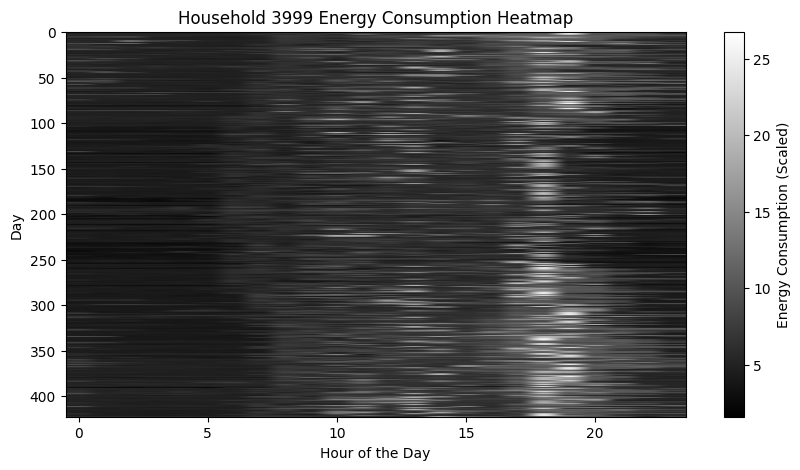

In [122]:

def plot_household_data(household_data, index):
    norm_data = np.clip(household_data, 0, 20.494745)
    norm_data = (norm_data / 20) * 255

    plt.figure(figsize=(10, 5))
    plt.imshow(norm_data, cmap="gray", aspect="auto")
    plt.colorbar(label="Energy Consumption (Scaled)")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Day")
    plt.title(f"Household {index} Energy Consumption Heatmap")
    plt.show()


household_0 = np_tensor_3d[3999]
plot_household_data(household_0, 3999)


In [ ]:
#3
#2000
for i in range(0,25):
    plot_household_data(np_tensor_3d[i])

# Generation of Anomalous Samples
Strategy is adapted from ``Jokar et al (P. Jokar, N. Arianpoo, and V. C. M. Leung, “Electricity theft
 detection in AMI using customers’ consumption patterns,”
 IEEE Transactions on Smart Grid, vol. 7, no. 1, pp. 216–226,
 2016.)``

 1. h1(x)

In [80]:
def h(x):
    np.random.seed(42)  #for reproducibility
    anomalous_x = np.zeros_like(x)
    
    for i in range(x.shape[0]):
        # Randomly select a transformation method (1-6)
        method = np.random.randint(1, 7)
        daily_data = x[i].copy()
        
        if method == 1:
            # h1: Scale all values by random alpha (0.1-0.8)
            alpha = np.random.uniform(0.1, 0.8)
            anomalous_x[i] = alpha * daily_data
            
        elif method == 2:
            # h2: Zero out random contiguous block (min 4 hours)
            min_off = 4
            start = np.random.randint(0, 24 - min_off)
            duration = np.random.randint(min_off, 24 - start + 1)
            end = start + duration
            daily_data[start:end] = 0
            anomalous_x[i] = daily_data
            
        elif method == 3:
            # h3: Scale each hour by different random gamma (0.1-0.8)
            gammas = np.random.uniform(0.1, 0.8, size=24)
            anomalous_x[i] = gammas * daily_data
            
        elif method == 4:
            # h4: Replace with mean * random gamma per hour
            daily_mean = np.mean(daily_data)
            gammas = np.random.uniform(0.1, 0.8, size=24)
            anomalous_x[i] = gammas * daily_mean
            
        elif method == 5:
            # h5: Replace all values with daily mean
            daily_mean = np.mean(daily_data)
            anomalous_x[i] = np.full(24, daily_mean)
            
        elif method == 6:
            # h6: Reverse the hourly order
            anomalous_x[i] = daily_data[::-1]
            
    return anomalous_x

In [81]:
n_households, _, __ = np_tensor_3d.shape

# Generate anomalous dataset by applying h() to each household's data
np_tensor_3d_anomalous = np.array([h(np_tensor_3d[i]) for i in range(n_households)])


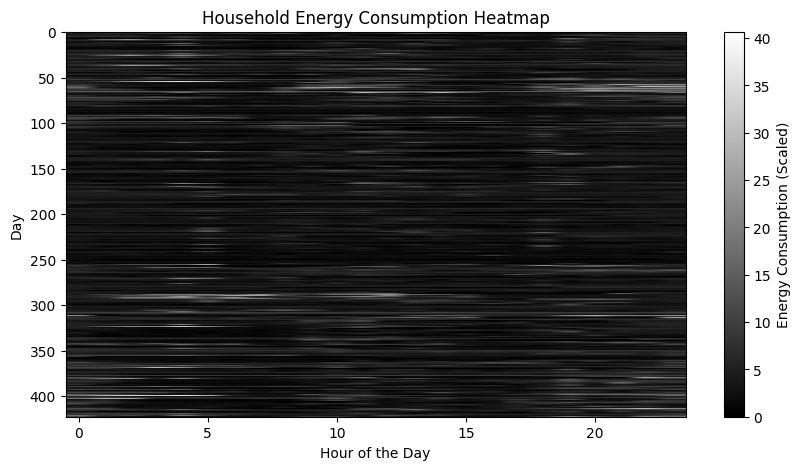

In [84]:
plot_household_data(np_tensor_3d_anomalous[0])

In [ ]:
for i in range(0,25):
    plot_household_data(np_tensor_3d_anomalous[i])

In [86]:
np_tensor_3d.dtype

dtype('float32')

In [88]:
np_tensor_3d.nbytes/(1024**2)

158.81863403320312

## Machine Learning

In [107]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [217]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#helper functions

#Helper function to plot the ROC curve for a given model.
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


# Plot Loss Curves for CNN
def plot_loss(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Train CNN and Track Loss
def train_cnn(model, X_train, y_train, X_test, y_test, epochs=10):
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=1)
    return history


# Plot Model Performance
def plot_model_performance(model_performance):
    metrics = ["accuracy", "precision", "recall", "f1"]
    models = list(model_performance.keys())
    scores = np.array([[model_performance[m][metric] for metric in metrics] for m in models])
    
    x = np.arange(len(models))
    width = 0.2
    
    plt.figure(figsize=(10, 5))
    for i, metric in enumerate(metrics):
        plt.bar(x + i * width, scores[:, i], width=width, label=metric)
    
    plt.xticks(x + width, models)
    plt.ylabel("Score")
    plt.title("Model Performance Comparison")
    plt.legend()
    plt.show()

def plot_confusion_matix(y_test, y_pred, tag):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {tag}")
    plt.show()    

In [96]:
X_normal = np_tensor_3d  # Shape: (n_households, n_days, 24)
X_anomalous = np_tensor_3d_anomalous  # Shape: (n_households, n_days, 24)

# Labels: Normal (0), Anomalous (1)
y_normal = np.zeros(X_normal.shape[0])
y_anomalous = np.ones(X_anomalous.shape[0])

X_normal_reshaped = X_normal.reshape(-1, 24)
scaler = MinMaxScaler()
scaler.fit(X_normal_reshaped)  # Fit only on normal data

# Apply the same transformation to both normal and anomalous data
X_normal_scaled = scaler.transform(X_normal_reshaped).reshape(X_normal.shape)
X_anomalous_scaled = scaler.transform(X_anomalous.reshape(-1, 24)).reshape(X_anomalous.shape)

# Combine after normalization
X = np.concatenate([X_normal_scaled, X_anomalous_scaled], axis=0)
y = np.concatenate([y_normal, y_anomalous], axis=0)

# Reshape for CNN input
X = X[..., np.newaxis]  # Shape: (n_households, n_days, 24, 1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [98]:
X.shape

(8202, 423, 24, 1)

In [99]:
#cnn model
cnn_model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation="relu", padding="same", input_shape=(X.shape[1], X.shape[2], 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    keras.layers.GlobalAveragePooling2D(),
])

#cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#history = train_cnn(cnn_model, X_train, y_train, X_test, y_test)

#plot_loss(history)


#extract Features for downstream models
X_train_features = cnn_model.predict(X_train)
X_test_features = cnn_model.predict(X_test)



c:\Users\asogw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


206/206 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [100]:
models_performances = {}

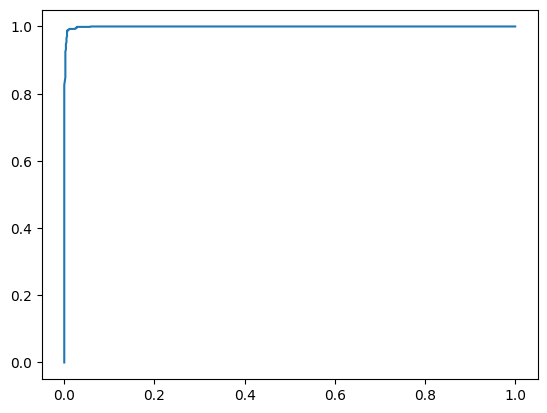

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RF Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_features, y_train)

y_pred_rf = rf_classifier.predict(X_test_features)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_features)[:, 1]

#performance metrics
models_performances["CNN-RF"] = {
    "accuracy": accuracy_score(y_test, y_pred_rf),
    "precision": precision_score(y_test, y_pred_rf),
    "recall": recall_score(y_test, y_pred_rf),
    "f1": f1_score(y_test, y_pred_rf)
}

plot_roc_curve(y_test, y_pred_proba_rf, "CNN-RF")


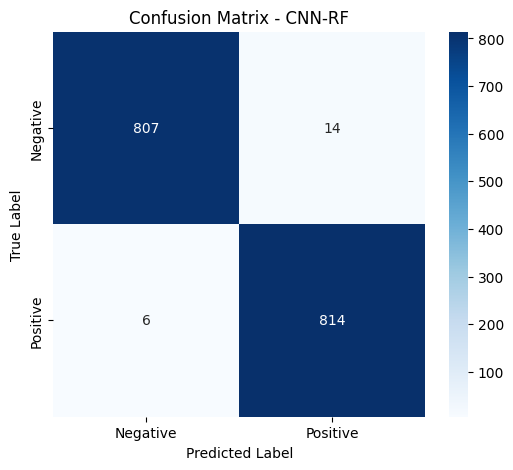

In [218]:
plot_confusion_matix(y_test, y_pred_rf, "CNN-RF")

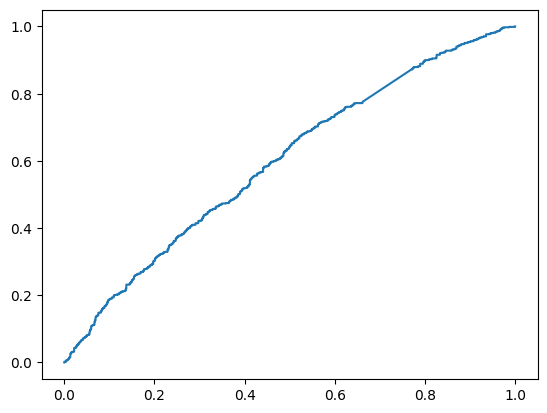

In [109]:
from sklearn.svm import SVC

# SVM Classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train_features, y_train)

y_pred_svm = svm_classifier.predict(X_test_features)
y_pred_proba_svm = svm_classifier.predict_proba(X_test_features)[:, 1]  # Get probability for ROC

# Performance metrics
models_performances["CNN-SVM"] = {
    "accuracy": accuracy_score(y_test, y_pred_svm),
    "precision": precision_score(y_test, y_pred_svm),
    "recall": recall_score(y_test, y_pred_svm),
    "f1": f1_score(y_test, y_pred_svm)
}

plot_roc_curve(y_test, y_pred_proba_svm, "CNN-SVM")


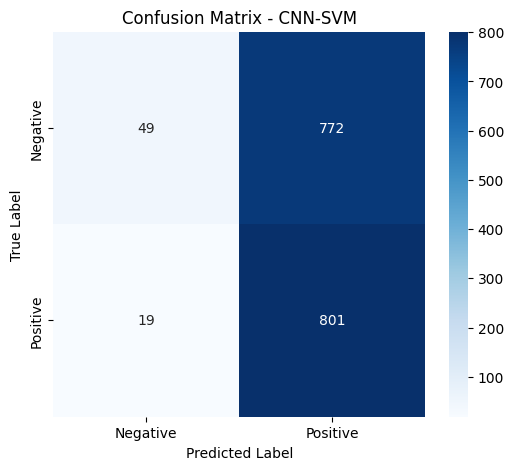

In [219]:
plot_confusion_matix(y_test, y_pred_svm, "CNN-SVM")

c:\Users\asogw\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 181s 834ms/step - accuracy: 0.6595 - loss: 0.6374 - val_accuracy: 0.6137 - val_loss: 0.6388
Epoch 2/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 147s 715ms/step - accuracy: 0.5309 - loss: 0.6801 - val_accuracy: 0.5308 - val_loss: 0.7368
Epoch 3/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 139s 677ms/step - accuracy: 0.6396 - loss: 0.6403 - val_accuracy: 0.8190 - val_loss: 0.5133
Epoch 4/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 143s 693ms/step - accuracy: 0.7685 - loss: 0.4911 - val_accuracy: 0.8275 - val_loss: 0.6052
Epoch 5/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 146s 705ms/step - accuracy: 0.7165 - loss: 0.5549 - val_accuracy: 0.9037 - val_loss: 0.2654
Epoch 6/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 149s 726ms/step - accuracy: 0.8701 - loss: 0.3296 - val_accuracy: 0.4156 - val_loss: 0.8280
Epoch 7/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 169s 819ms/step - accuracy: 0.8201 - loss: 0.4099 - val_accuracy: 0.8099 - val_loss: 0.4584
Epoch 8/10
206/206 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.6901 - lo

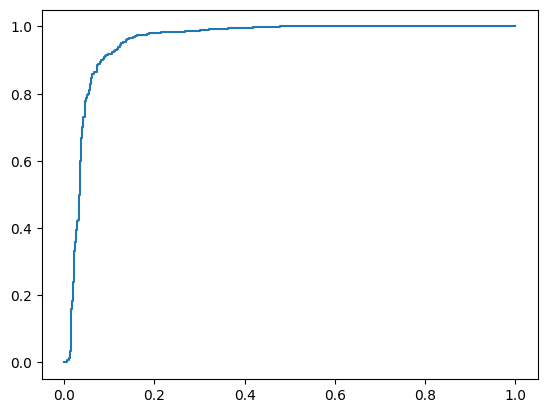

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train LSTM
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Get probabilities for ROC curve
y_pred_proba_lstm = lstm_model.predict(X_test).flatten()  # Convert to 1D array

# Performance metrics
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)  # Convert probabilities to binary predictions
models_performances["CNN-LSTM"] = {
    "accuracy": accuracy_score(y_test, y_pred_lstm),
    "precision": precision_score(y_test, y_pred_lstm),
    "recall": recall_score(y_test, y_pred_lstm),
    "f1": f1_score(y_test, y_pred_lstm)
}

plot_roc_curve(y_test, y_pred_proba_lstm, "CNN-LSTM")


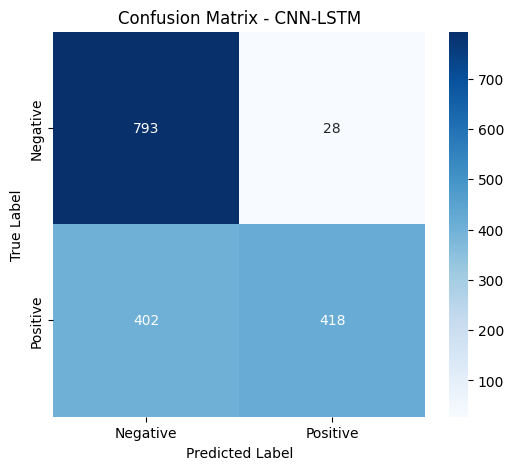

In [220]:
plot_confusion_matix(y_test, y_pred_lstm, "CNN-LSTM")

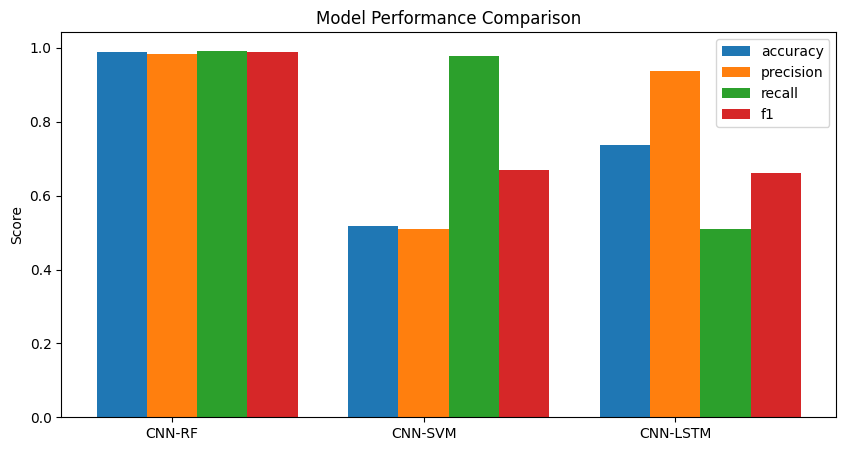

In [111]:
plot_model_performance(models_performances)